/home/vfornemo/project/PytChem



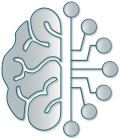

**Start at:** Friday 01 December 2023, 19:56:48  
**Hostname:** vfornemo-server (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg,bg,hl,color
vID.init(cwd0)

import tools4pyPhysChem as t4pPC

#cancel the "last show-up" behaviour of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

__author__ = "Thierry Leininger, LCPQ (CNRS-UT3 lab, Toulouse, France)"

 # Harmonic Oscillator

## Introduction

<div class="intro">

In this project, we propose to solve the Schrödinger equation for the one-dimensional quantum harmonic oscillator and vizualise the corresponding solutions and some of their properties. As usual, the Schrödinger equation reads:

$$\hat{H}(x)\psi_v(x)=E_v\psi_v(x)$$

with $\hat{H}=\hat{T}+\hat{V}$

The kinetic energy is given by $ \hat{T}= \frac{\hat{p}^2}{2m} $ which, with $\hat{p}=- i\hbar \frac{\partial}{\partial \hat{x}}$, becomes


$$ \hat{T}=-\frac{\hbar^{2}}{2m} \frac{\partial}{\partial x^2}$$

In the case of the harmonic oscillator the potential energy of the particle is simply 
$$\hat{V} = \frac{1}{2}kx^2$$


Thus, the Schrodinger equation one has to solve is 
    
$$[-\frac{\hbar^{2}}{2m} \frac{\partial}{\partial x^2}+\frac{1}{2}kx^2]\psi_v(x) = E_v\psi_v(x)$$

</div>

<div class="exE">

- From now on, we will choose $\hbar=m=k=1$. Plot the corresponding harmonic potential.
</div>

Text(0.5, 0, 'x')

Text(0, 0.5, 'V')

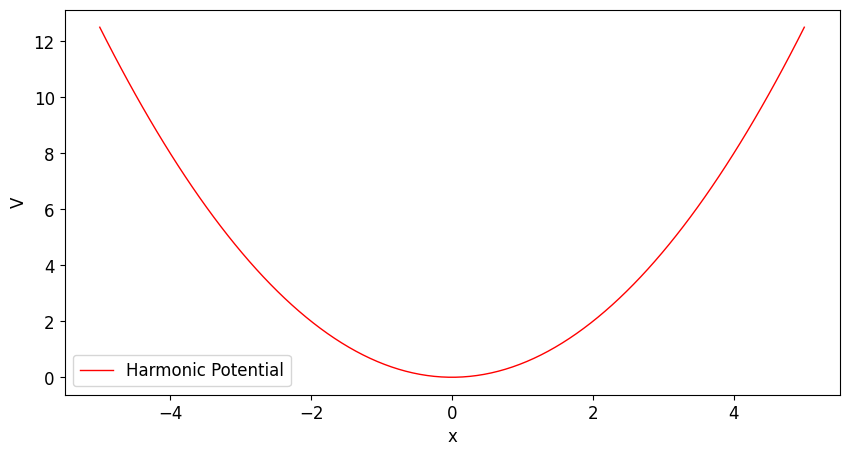

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# Definition of the potential energy function
def har_V(x):
    V = 0.5*x**2
    return V

# Generate linspace
_x = np.linspace(-5.,5.,100)
_V = har_V(_x)

# Plotting
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
plt.plot(_x, _V, linewidth=1,color='red',label="Harmonic Potential")
plt.legend()
plt.xlabel("x")
plt.ylabel("V")
plt.show()



### Solutions of the Schrödinger Equation

<div class="intro">

As suggested above, the solutions of the Quantum Harmonic Oscillator depend on a (<i>vibrational</i>) quantum number $v$.

The energies ($ie$ eigenvalues) are given by

$$ E_v=(v+\frac{1}{2})\hbar\omega$$ with $v=0, 1, 2, ...$ and $\omega=\sqrt{(\frac{k}{m})}$


The corresponding wavefunctions ($ie$ eigenfunctions) are given by

$$\Psi_v=N_vH_ve^{-y^2/2}$$ where $N_v$ is the normalization factor, $H_v$ the <b>Hermite polynomial</b> and $y=(\frac{mk}{\hbar^2})^{1/4}x$.


The <b>Hermite polynomials</b> are defined using a recurrence relation
$$H_{v+1}=2yH_v-2vH_{v-1}$$
with $H_0=1$ and $H_1=2y$.


<div class="exE">

Code a `Hv(v,y)` function returning the evaluation of $v^{th}$ Hermite polynomial, $H_v$ at a given value $y$
</div>

In [3]:
import sympy as sym

# Definition of the Hermite polynomials
def Hv(v, y):
    
    # Check if v is a natural integer
    if v < 0 or type(v) != int:
        raise RuntimeError("Error: v must be a positive integer or zero.")

    H0 = 1
    H1 = 2*y

    if v == 0:
        return H0
    elif v == 1:
        return H1
    else:
        for n in range(2, v+1, 1):
            Hn = 2*y*H1 - 2*(n-1)*H0
            H0 = H1
            H1 = Hn
        return H1 # We should return Hn, here Hn = H1. Returning Hn will result in an reference error.


# test
y = sym.symbols('y')
for i in range(5):
    print("H{0} = ".format(i))
    Hv(i, y)


H0 = 


1

H1 = 


2*y

H2 = 


4*y**2 - 2

H3 = 


2*y*(4*y**2 - 2) - 8*y

H4 = 


-24*y**2 + 2*y*(2*y*(4*y**2 - 2) - 8*y) + 12

<div class="exE">

Using the `hermite` function from `sympy`, print the first 6 Hermite polynomials and check your code written in the previous cell for a few values of <i>v</i> and <i>y</i>.
The results will be advantageoulsy presented in a table (see example below) beside the expression of the `hermite`polynomial.

<p style="text-align:center;"><img width="280" src = "./tableQHO.jpg"/></p>

</div>

In [4]:
from sympy import hermite_poly

# generate y data
y = sym.symbols('y')
yl = np.linspace(0, 5, 5)

# compare the results
for i in range(6):
    print("v = {0}, H_v = {1}".format(i, hermite_poly(i, y)))
    print("  y        Hermite(y)       Hv(y)")
    for j in range(len(yl)):
        sym_val = hermite_poly(i, yl[j]).evalf()
        hv_val = Hv(i, yl[j])
        print("{0:5.2f} {1:14.6f} {2:14.6f}".format(yl[j], sym_val, hv_val))
    print()
    


v = 0, H_v = 1
  y        Hermite(y)       Hv(y)
 0.00       1.000000       1.000000
 1.25       1.000000       1.000000
 2.50       1.000000       1.000000
 3.75       1.000000       1.000000
 5.00       1.000000       1.000000

v = 1, H_v = 2*y
  y        Hermite(y)       Hv(y)
 0.00       0.000000       0.000000
 1.25       2.500000       2.500000
 2.50       5.000000       5.000000
 3.75       7.500000       7.500000
 5.00      10.000000      10.000000

v = 2, H_v = 4*y**2 - 2
  y        Hermite(y)       Hv(y)
 0.00      -2.000000      -2.000000
 1.25       4.250000       4.250000
 2.50      23.000000      23.000000
 3.75      54.250000      54.250000
 5.00      98.000000      98.000000

v = 3, H_v = 8*y**3 - 12*y
  y        Hermite(y)       Hv(y)
 0.00       0.000000      -0.000000
 1.25       0.625000       0.625000
 2.50      95.000000      95.000000
 3.75     376.875000     376.875000
 5.00     940.000000     940.000000

v = 4, H_v = 16*y**4 - 48*y**2 + 12
  y        Hermite(y)

<div class="exE">

Use the previous expression of the Hermite polynomials to verify with `sympy` that the normalization factor $N_v$ 
are given by $N=(\pi ^{1/2} 2^v v!)^{-1/2}$.</div>

In [5]:
from sympy import oo

# Perform normalization to get the normalization coefficient
def norm_coeff(f):
    """
    Normalization
    
    input:
        - f: a function of v and y
    returns:
        normalization coefficient
    """
    f_int = sym.integrate(f*sym.conjugate(f), (y,-oo,+oo))
    f_int = 1/sym.sqrt(f_int)

    return f_int

# Generate normalization factor of a given v
def norm_factor(v):
    """
    Normalization factor
    
    input:
        - v: quantum number
    returns:
        normalization factor
    """
    N = 1/sym.sqrt(sym.factorial(v)*2**v*sym.sqrt(sym.pi))
    return N

for v in range(10):
    f = hermite_poly(v, y)*sym.exp(-y**2/2)
    N1 = norm_coeff(f).evalf()
    N2 = norm_factor(v).evalf()
    assert N1 == N2
    print("v = {0}, N1 = {1}, N2 = {2}".format(v, N1, N2))




v = 0, N1 = 0.751125544464943, N2 = 0.751125544464943
v = 1, N1 = 0.531125966013599, N2 = 0.531125966013599
v = 2, N1 = 0.265562983006799, N2 = 0.265562983006799
v = 3, N1 = 0.108415633823010, N2 = 0.108415633823010
v = 4, N1 = 0.0383307149314439, N2 = 0.0383307149314439
v = 5, N1 = 0.0121212363525988, N2 = 0.0121212363525988
v = 6, N1 = 0.00349909953554198, N2 = 0.00349909953554198
v = 7, N1 = 0.000935173687444138, N2 = 0.000935173687444138
v = 8, N1 = 0.000233793421861034, N2 = 0.000233793421861034
v = 9, N1 = 0.0000551056379982482, N2 = 0.0000551056379982482


## Wavefunctions

<div class="rqT" title="Directives">
    
From now on, you have to do symbolic algebra with the SymPy library.
</div>

<div class="exE">
Compute the left-hand side of Schrödinger equation to verify that $\Psi_v(x)$ and $E_v$ are eigenfunctions and eigenvalues.

In [6]:
# Construct nabla2(f)
# Now we reconsider k, m and hbar as zeros


# Define H(f)
def H(f):
    """
    Hamiltonian
    
    input:
        - f: a function of y, y = (mk/hbar^2)^1/4*x
    returns:
        the hamiltonian of f
    """
    sym.simplify(f)
    
    # Calculate nabla2(f)
    x = sym.symbols('x')
    # m,k,hbar = sym.symbols('m k hbar')
    # Now consider k, m and hbar as zeros to simplify the calculation
    m = 1
    k = 1
    hbar = 1
    f = f.subs(y, (m*k/hbar**2)**(1/4)*x)

    x_der1 = sym.diff(f,x)
    x_der2 = sym.diff(x_der1,x)

    Hf = -hbar**2/(2*m)*x_der2 + 0.5*k*x**2*f
    sym.simplify(Hf)
    return Hf

def phi_v(v):
    """
    Wave function
    
    input:
        - v: quantum number
    returns:
        vth order of wave function of harmonic oscillator (as a function of x)
    """
    f = norm_factor(v)*hermite_poly(v, y)*sym.exp(-y**2/2)
    f = f.subs(y, (m*k/hbar**2)**(1/4)*x)

    return f

x = sym.symbols('x')
# m,k,hbar = sym.symbols('m k hbar')
m = 1
k = 1
hbar = 1

def E_v(v):
    """
    Energy
    
    input:
        - v: quantum number
    returns:
        vth order of energy of harmonic oscillator
    """
    E = (0.5+v)
    return E

for v in range(6):
    f = phi_v(v)
    E = H(f)/f
    E = sym.simplify(E)
    E


0.500000000000000

1.50000000000000

2.50000000000000

3.50000000000000

4.50000000000000

5.50000000000000

#### Lowest wavefunctions and their associated energy

<div class="exE">
    
Complete the previous plot by plotting the $\Psi_v(x)$ at level $E_v$.

Text(0.5, 0, '$x$')

Text(0, 0.5, '$\\phi_v(x)$')

Text(0.5, 0, '$x$')

Text(0, 0.5, '$\\phi_v(x)$')

Text(0.5, 0, '$x$')

Text(0, 0.5, '$\\phi_v(x)$')

Text(0.5, 0, '$x$')

Text(0, 0.5, '$\\phi_v(x)$')

Text(0.5, 0, '$x$')

Text(0, 0.5, '$\\phi_v(x)$')

Text(0.5, 0, '$x$')

Text(0, 0.5, '$\\phi_v(x)$')

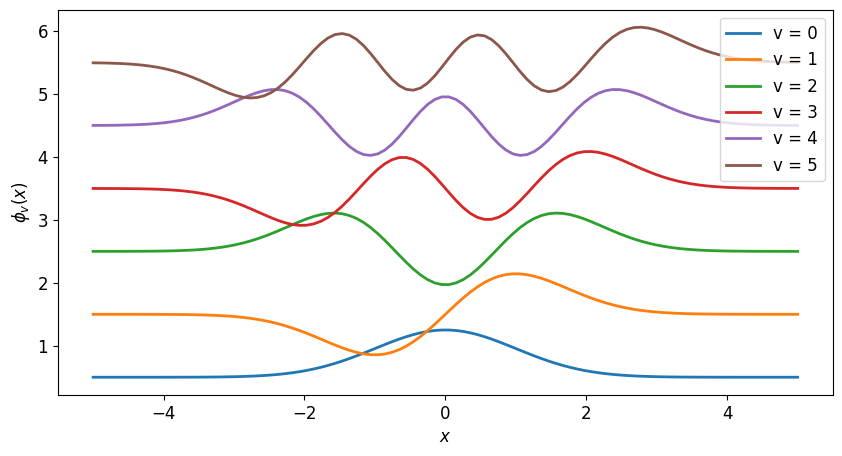

In [7]:
#### Plots

for v in range(6):
    # Generate linspace
    f = phi_v(v)
    _x = np.linspace(-5.,5.,100)
    _f = sym.lambdify(x, f)
    E = E_v(v)
    
    # Plotting
    plt.plot(_x, _f(_x)+E, linewidth=2,label="v = {0}".format(v))
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$\phi_v(x)$")
plt.show()

### Expectations values

<div class="intro">

The expectation value of an observable $\Omega$ is given by
$$<\Omega >=\int_{-\infty}^{+\infty}{\Psi^*_v \Omega \Psi_v dx}$$   

<div class="exE">    
Show that, with the values chosen for the constants, $<x^2>=v+\frac{1}{2}$.

In [8]:
def expc_val(f, A):
    """
    Expectation value of an observable
    
    input:
        - f: a wavefunction of x, x belongs to (-oo, +oo)
        - A: an observable
    returns:
        expectation value of A
    """
    print(f)
    expc = sym.integrate(f*A*f, (x,-oo,+oo))
    expc = sym.simplify(expc)
    return expc

x = sym.symbols('x')
for v in range(6):
    E1 = expc_val(phi_v(v), x**2)
    E2 = v + 0.5
    assert E1 == E2
    print("v = {0}, E1 = {1}, E2 = {2}".format(v, E1, E2))


exp(-0.5*x**2)/pi**(1/4)
v = 0, E1 = 0.500000000000000, E2 = 0.5
1.0*sqrt(2)*x*exp(-0.5*x**2)/pi**(1/4)
v = 1, E1 = 1.50000000000000, E2 = 1.5
sqrt(2)*(4.0*x**2 - 2)*exp(-0.5*x**2)/(4*pi**(1/4))
v = 2, E1 = 2.50000000000000, E2 = 2.5
sqrt(3)*(8.0*x**3 - 12.0*x)*exp(-0.5*x**2)/(12*pi**(1/4))
v = 3, E1 = 3.50000000000000, E2 = 3.5
sqrt(6)*(16.0*x**4 - 48.0*x**2 + 12)*exp(-0.5*x**2)/(48*pi**(1/4))
v = 4, E1 = 4.50000000000000, E2 = 4.5
sqrt(15)*(32.0*x**5 - 160.0*x**3 + 120.0*x)*exp(-0.5*x**2)/(240*pi**(1/4))
v = 5, E1 = 5.50000000000000, E2 = 5.5


<div class="exE">
Search the nodes of the wavefunctions (<i>ie</i> solve $H_v(y)=0$) for different values of $v$ and make a plot of these nodes.

</div>

Text(0.5, 1.0, 'v = 5')

Text(0.5, 1.0, 'v = 4')

Text(0.5, 1.0, 'v = 3')

Text(0.5, 1.0, 'v = 2')

Text(0.5, 1.0, 'v = 1')

Text(0.5, 1.0, 'v = 0')

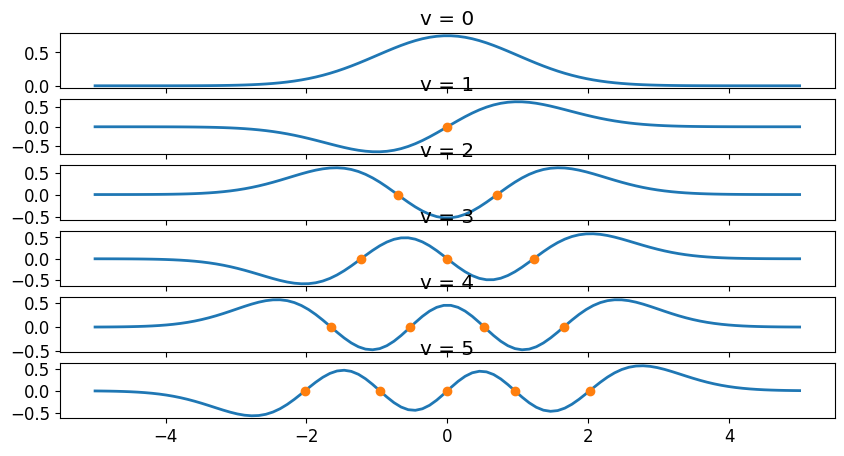

In [9]:
fig, axs = plt.subplots(6)

for v in reversed(range(6)):
    x, y = sym.symbols('x y')
    sol = sym.solve(hermite_poly(v,y), y)
    phi = phi_v(v)
    _phi = sym.lambdify(x, phi)
    _x = np.linspace(-5.,5.,100)
    axs[v].plot(_x, _phi(_x), linewidth=2)
    axs[v].set_title("v = {0}".format(v))
    axs[v].plot(sol, np.zeros(len(sol)), 'o', label="v = {0}".format(v))


# End

In [10]:
vID.end(cwd0)

**End at:** Friday 01 December 2023, 19:56:56  
**Duration:** 00:00:08 133ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>